<a href="https://colab.research.google.com/github/sigdelakshey/EDA_DS/blob/main/EDA_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Steps Followed



> 1. Selecting a large Real-World Dataset

> 2. Data Preparation & Cleaning using Pandas and Numpy

> 3. Exploratory Analysis & Visualization using Matplotlib & Seaborn

> 4. Summarization, Inference & Conclusion

> 5. Documentation and Publication Online


## 1. EDA_US_Accidents
  - Dataset Source: Kaggel
  - Dataset Size: 1GB
  - Dataset Description: US car accidents dataset which covers **49** states of the USA. It contains about **3 million**  accidents records.
  -This Datasets can provide useful information about accidents and help us come up with preventive measaures.





> Downloading Dataset



In [ ]:
pip install opendatasets --upgrade

Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.20)


In [ ]:
import opendatasets as od
download_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)


Skipping, found downloaded files in "./us-accidents" (use force=True to force download)
Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename='./us-accidents/US_Accidents_Dec20_Updated.csv'

## 2. Data Preparation & Cleaning

  - Loading dataset using pandas
  - Looking up through data and columns
  - Handling consistency & missing values



In [ ]:
import pandas as pd
df = pd.read_csv(data_filename)
df

In [ ]:
df.info()

In [ ]:
df.describe()


> Finding number of numeric columns



In [ ]:
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 numeric_df=df.select_dtypes(include=numerics)
 len(numeric_df.columns)



> Counting missing values per columns



In [ ]:
df.isna().sum()



> Percentage of missing values per columns



In [ ]:
missing_percent= df.isna().sum().sort_values(ascending=False) / len(df)
missing_percent

In [ ]:
missing_percent[missing_percent != 0]

In [ ]:
 missing_percent[missing_percent!=0].plot(kind='barh')

## 3. Exploratory Analysis & Visualization





In [ ]:
df.columns



> Picking up few columns to work with
  1. City
  2. Start Time
  3. Start_Lat, Start_Lng
  4. Weather_condition



### City

In [ ]:
cities= df.City.unique()
len(cities)

In [ ]:
cities_accident = df.City.value_counts()
cities_accident[:20]



> Common Knowledge: New York; state with highest population doesn't seem to present even in Top 20 in terms of car accidents which is pretty unusal



In [ ]:
'New York' in df.City

In [ ]:
'NY' in df.State



> Dataset seems to not have any records about car accidents that happened in New York meaning....New York is the missing state.


In [ ]:
cities_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


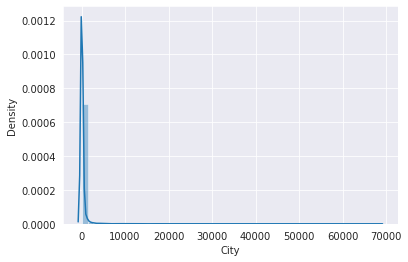

In [ ]:
sns.distplot(cities_accident)

In [ ]:
high_accident_cities = cities_accident[cities_accident >= 1000]
low_accident_cities = cities_accident[cities_accident < 1000]

In [ ]:
len(high_accident_cities)

513

In [ ]:
len(high_accident_cities)/ len(cities)

0.04351145038167939

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


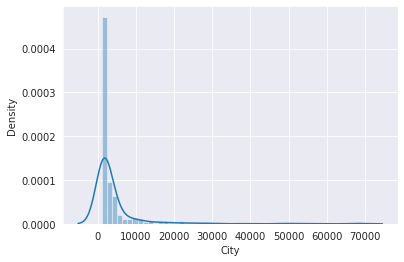

In [ ]:
sns.distplot(high_accident_cities)

In [ ]:
len(low_accident_cities)

11276

In [ ]:
len(low_accident_cities)/len(cities)

0.9564037319762511

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


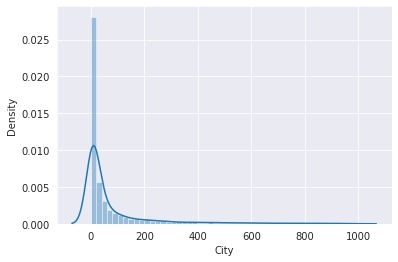

In [ ]:
sns.distplot(low_accident_cities)

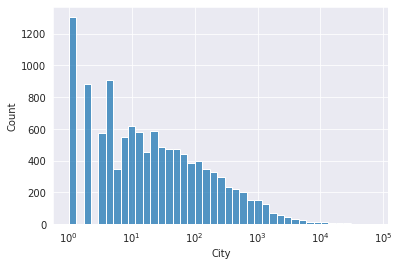

In [ ]:
sns.histplot(cities_accident, log_scale= True)

In [ ]:
cities_accident[cities_accident==1]

Township 9       1
Swampscott       1
Margaretville    1
Thawville        1
Grover Beach     1
                ..
Chelan           1
Ponca            1
Toutle           1
Monarch          1
Glenfield        1
Name: City, Length: 1306, dtype: int64

### Start Time

In [ ]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [ ]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [ ]:
df.Start_Time= pd.to_datetime(df.Start_Time)
df.Start_Time[0]

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, norm_hist=True, kde=False)



> High % of accidents seems to occur between 6 am to 10 am  &  3 pm to 6 pm
   ( reason may be because are hurry to get back and forth to work )



In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, norm_hist=True, kde=False)



> Less accidents to happen during Weekends ( reason may be there is no work for people on these days )



In [ ]:
sundays_ST= df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_ST.dt.hour, bins=24, norm_hist=True, kde=False)

In [ ]:
saturdays_ST= df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturdays_ST.dt.hour, bins=24, norm_hist=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


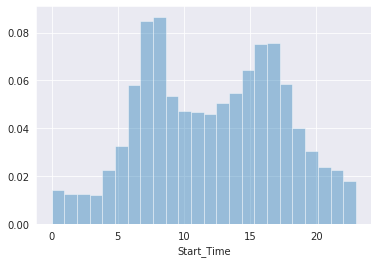

In [ ]:
mondays_ST= df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_ST.dt.hour, bins=24, norm_hist=True, kde=False)



> Distribution of accidents over an hour on weekends seems to be more evenly distributed than on normal weekdays



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


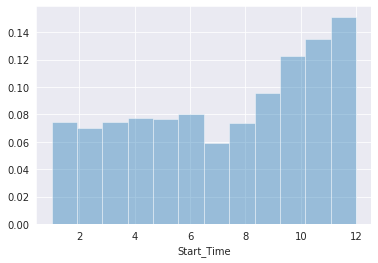

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)



> Accidents seems to occur more in winter than in summer ????



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


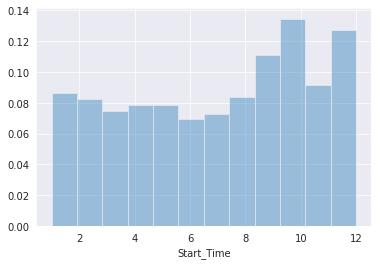

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


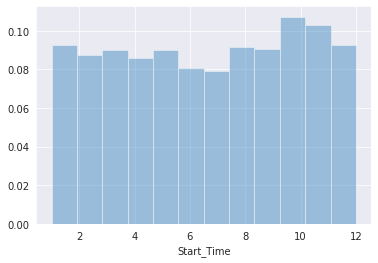

In [ ]:
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


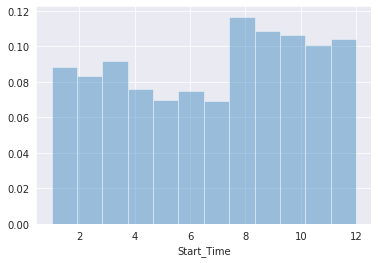

In [ ]:
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


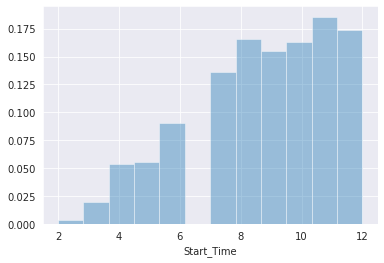

In [ ]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)



> In General, accidents semms to occur slightly more in winter compare to summer.


> However, maybe because of the missing datas for few months in 2016, overall trend seems to be exgagrated. 





### Start_Lat, Start_Lng


In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1*len(df)))

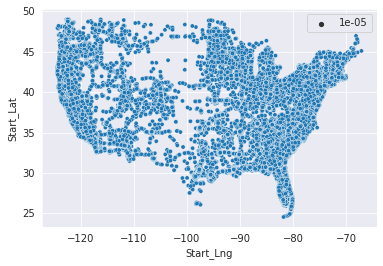

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat,size=0.00001)

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001*len(df)))

In [ ]:
lat_lng_pair=zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng))

In [ ]:
map =folium.Map()
HeatMap(lat_lng_pair).add_to(map)
map



> Accidents seems to be curated more around coast areas than in middle-region US



### Weather_condition

In [ ]:
df.Weather_Condition.unique()

In [ ]:
len(df.Weather_Condition.unique())

In [ ]:
weathers = df.Weather_Condition.value_counts()
weathers

In [ ]:
sns.distplot(weathers)

In [ ]:
weathers[:10].plot(kind='barh')



> It supprising to see that highest number of accidents occurs when waether is clear or fair....reason behind that????





> Likely explanination may be that during extreme weathers people prefer not to drive.

